In [38]:
#решение 1 задачи
import numpy as np
a = np.floor(10 * np.random.rand(10,3) - 5)
print(np.array([a[lines][np.argsort(np.abs(a[lines] - 0.5))[0]] for lines in range(10)]))

[ 0. -1.  0. -1. -2.  4.  0.  1. -2. -1.]


In [39]:
#решение 2 задачи
a = np.floor(10 * np.random.rand(6,6) + 1)
print(np.array([np.sum(a[lines]) / np.min(a.transpose()[lines]) for lines in range(6)]))

[27. 41. 38. 11. 20. 43.]


In [40]:
#решение 3 задачи
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(np.array([(int)(x[i] == 0) * x[i+1] for i in range(len(x) - 1)])))

5


In [41]:
#решение 4 задачи
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(np.array([x[j] + len(i[i == j]) for j in range(10)]))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [42]:
#решение 5 задачи
import math

def dist( point, clusters ):
    return list( map( lambda v: math.sqrt( np.sum(abs( point + ( v * -1 ) ) ** 2 ) ), clusters ) )

def maxDist( centers, clusters ):
    matr = ( centers, clusters )
    return np.max( list( map( lambda v: np.max( dist( v[0], v[1:][0] ) ) / len(v[1:][0]), matr ) ) )

def kmeans( x, k_or_guess, iter_max = 1000, crit = 0.5 ):
    if ( type(k_or_guess) is int ):
        ind = np.arange(len(x))
        np.random.shuffle(ind)
        rind = ind[:k_or_guess]

        clusters = x[rind]
    else:
        clusters = np.array( k_or_guess )
    
    cl_dist = clusters * clusters

    max_dist = max( dist( np.zeros( len( x[0] ) ), cl_dist ) )
    print( max_dist )
    max_dist_new = 0
    iterations = 0
    while ( abs(max_dist - max_dist_new) > crit ) and ( iterations < iter_max ):
        max_dist_new = max_dist
        dists = list(map( lambda v: dist( v, clusters ), x ))
        distrib = list( map( lambda v: np.argmin(v), dists ) )
        matr = np.column_stack( ( distrib, x ) )
        
        clusters_info = list( map( lambda v: np.array( list( filter( lambda t: t[0] == v, matr ) ) )[:,1:], np.arange( len( clusters ) ) ) )
        
        clusters_centers = list( map( lambda v: np.mean( v, axis = 0 ), clusters_info ) )

        cl_dist = np.absolute( clusters_centers + ( -1 * clusters ) )
        clusters = np.array(clusters_centers)
        max_dist = maxDist( clusters, clusters_info )
        iterations+=1
    print( 'Finished in', iterations, 'iterations.' )
    print( 'Cluster centers:', clusters )
    distortion = max_dist
    print( 'Distortion:', distortion )
    return clusters, distortion

[['0001' 'Male' '19' '15' '39']
 ['0002' 'Male' '21' '15' '81']
 ['0003' 'Female' '20' '16' '6']
 ['0004' 'Female' '23' '16' '77']
 ['0005' 'Female' '31' '17' '40']]


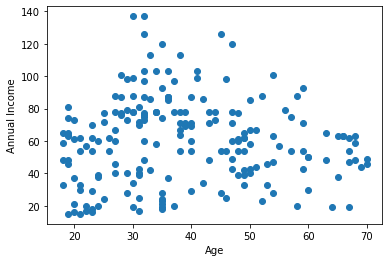

12815.353370079189
Finished in 4 iterations.
Cluster centers: [[ 26.4047619   69.16666667]
 [ 45.25        72.09375   ]
 [ 36.25       101.53125   ]
 [ 28.16666667  37.875     ]
 [ 60.53846154  32.53846154]
 [ 63.05555556  57.55555556]
 [ 28.47619048  20.04761905]
 [ 47.61111111  47.88888889]]
Distortion: 22.891327233294525


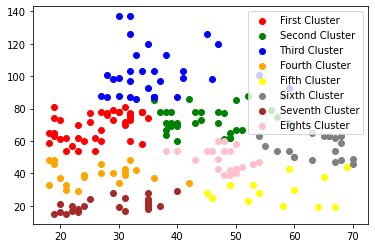

In [43]:
#решение 6 задачи
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
print(data[:5])

data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]



plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#k = 3
a = []
"""""
lis = []
lis.append(list(kmeans(data[:, 2:4], 2))[1])
for k in range(3, 10):
    lis.append(list(kmeans(data[:, 2:4], k))[1] - list(kmeans(data[:, 2:4], k - 1))[1])
n = np.argmin(np.abs(lis)) + 2
print(n)  #в этом случае n = 8
"""""
dataset = list( kmeans( data[:,2:4], 8 ) )
centroids = np.array( dataset[0] )
for i in range( len ( centroids ) ):
    a.append( [0] )
m = [0] * len( data[:,3] )
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin(np.array( [np.linalg.norm( data[:,2:4][j] - centroids[i] ) for i in range( len( centroids ) ) ] ) )
    a[m[j]].append(data[:,2:4][j])
for i in range( len( centroids ) ):
    a[i].pop(0)
plt.scatter(*np.array(a[0]).T, c='r', label = 'First Cluster')
plt.scatter(*np.array(a[1]).T, c='g', label = 'Second Cluster')
plt.scatter(*np.array(a[2]).T, c='b', label = 'Third Cluster')
plt.scatter(*np.array(a[3]).T, c='orange', label = 'Fourth Cluster')
plt.scatter(*np.array(a[4]).T, c='yellow', label = 'Fifth Cluster')
plt.scatter(*np.array(a[5]).T, c='grey', label = 'Sixth Cluster')
plt.scatter(*np.array(a[6]).T, c='brown', label = 'Seventh Cluster')
plt.scatter(*np.array(a[7]).T, c='pink', label = 'Eights Cluster')
plt.legend()
plt.show()

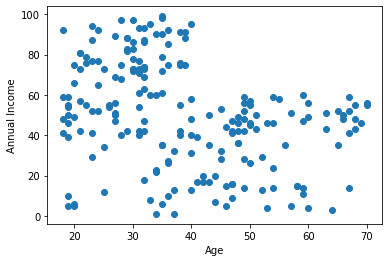

9451.94588431398
Finished in 4 iterations.
Cluster centers: [[27.46153846 63.23076923]
 [54.76363636 46.25454545]
 [38.76271186 20.38983051]
 [33.44       88.52      ]
 [23.         88.        ]]
Distortion: 14.292453330739098


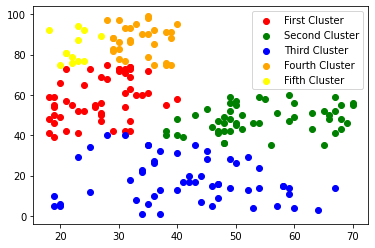

In [44]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#k = 3
a = []
"""""
lis = []
data_lis = np.transpose(np.vstack((data[:, 2], data[:, 4])))
lis.append(list(kmeans(data_lis, 2))[1])
for k in range(3, 10):
    lis.append(list(kmeans(data_lis, k))[1] - list(kmeans(data_lis, k - 1))[1])
n = np.argmin(np.abs(lis)) + 2
print(n)  #в этом случае n = 8
"""""
dataset = list( kmeans(data_lis, 5) )
centroids = np.array( dataset[0] )
for i in range( len( centroids ) ):
    a.append( [0] )
m = [0] * len( data[:,3] )
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin( np.array( [np.linalg.norm( data_lis[j] - centroids[i] ) for i in range( len( centroids ) ) ] ) )
    a[m[j]].append( data_lis[j] )
for i in range( len( centroids ) ):
    a[i].pop(0)
plt.scatter(*np.array(a[0]).T, c='r', label = 'First Cluster')
plt.scatter(*np.array(a[1]).T, c='g', label = 'Second Cluster')
plt.scatter(*np.array(a[2]).T, c='b', label = 'Third Cluster')
plt.scatter(*np.array(a[3]).T, c='orange', label = 'Fourth Cluster')
plt.scatter(*np.array(a[4]).T, c='yellow', label = 'Fifth Cluster')
#plt.scatter(*np.array(a[5]).T, c='grey', label = 'Sixth Cluster')
#plt.scatter(*np.array(a[6]).T, c='brown', label = 'Seventh Cluster')
#plt.scatter(*np.array(a[7]).T, c='pink', label = 'Eights Cluster')
plt.legend()
plt.show()

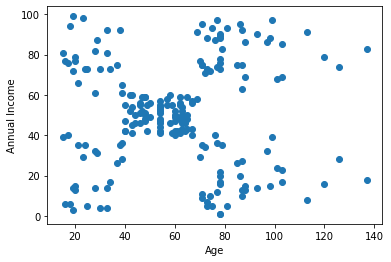

10217.248993736033
Finished in 3 iterations.
Cluster centers: [[55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [87.75       17.58333333]
 [25.72727273 79.36363636]]
Distortion: 24.214223221724637


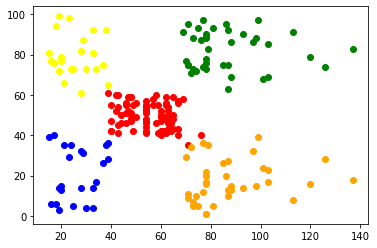

In [45]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

#k = 3
a = []
"""""
lis = []
lis.append(list(kmeans(data[:, 3:5], 2))[1])
for k in range(3, 10):
    lis.append(list(kmeans(data[:, 3:5], k))[1] - list(kmeans(data[:, 3:5], k - 1))[1])
n = np.argmin(np.abs(lis)) + 2
print(n)  #в этом случае n = 5
"""""
dataset = list(kmeans(data[:,3:5], 5))
centroids = np.array(dataset[0])
for i in range(len(centroids)):
    a.append([0])
m = [0] * len(data[:,3])
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin(np.array([np.linalg.norm( data[:,3:5][j] - centroids[i]) for i in range(len(centroids))]))
    a[m[j]].append(data[:,3:5][j])
for i in range(len(centroids)):
    a[i].pop(0)
plt.scatter(*np.array(a[0]).T, c='r', label = 'First Cluster')
plt.scatter(*np.array(a[1]).T, c='g', label = 'Second Cluster')
plt.scatter(*np.array(a[2]).T, c='b', label = 'Third Cluster')
plt.scatter(*np.array(a[3]).T, c='orange', label = 'Fourth Cluster')
plt.scatter(*np.array(a[4]).T, c='yellow', label = 'Fifth Cluster')
#plt.scatter(*np.array(a[5]).T, c='grey', label = 'Sixth Cluster')
#plt.scatter(*np.array(a[6]).T, c='brown', label = 'Seventh Cluster')
#plt.scatter(*np.array(a[7]).T, c='pink', label = 'Eights Cluster')